In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
path_link = r"C:\Users\GAdmin\Desktop\srp\beam.xlsx"
Data = pd.read_excel(path_link, sheet_name="Sheet4")
Data = Data[['distance', 'mean', 'stddev']]
Data

,distance,mean,stddev
0,3.00,1015.150,3.592005
1,5.30,889.900,2.896550
2,7.80,761.600,2.939388
3,9.80,665.700,4.100000
4,12.00,584.500,1.774824
5,14.40,480.150,1.898025
6,15.90,401.450,1.876832
7,18.30,290.750,1.677051
8,20.40,190.200,1.004988
9,22.50,100.750,2.315707


In [27]:
x_values = Data['distance'] * 10**-2    #m
y_values = Data['mean'] * 10**-6        #m
stddev = Data['stddev'] * 10**-6        #m

$$w(z) = w_0 \sqrt{1+\frac{(z-z_0)^2 M_{sq}^2 \lambda^2}{\pi^2 w_0^4}} \approx w_0 \left(\frac{z_0 - z}{z_R} \right)$$

In [45]:
wavelength = 532 * 10**-9 #m

def waist_func(z, w0, z0, Msq):
    return w0 * np.sqrt(1 + ((z - z0) ** 2 * Msq**2 * wavelength ** 2) / (np.pi**2 * w0 ** 4))

popt, pcov = curve_fit(waist_func, x_values, y_values, p0 = [0.00002, 0.5, 1.4])

w0, z0, Msq = popt
print(f"w0: {w0 * 10 ** 6} um")
print(f"z0: {z0 * 10 ** 2} cm")
print(f"Msq: {Msq}")

unc_w0 = pcov[0,0]**0.5
unc_z0 = pcov[1,1]**0.5
unc_M2 = pcov[2,2]**0.5

w0: 42.37942072024787 um
z0: 24.388139869314923 cm
Msq: 1.1703308306562403


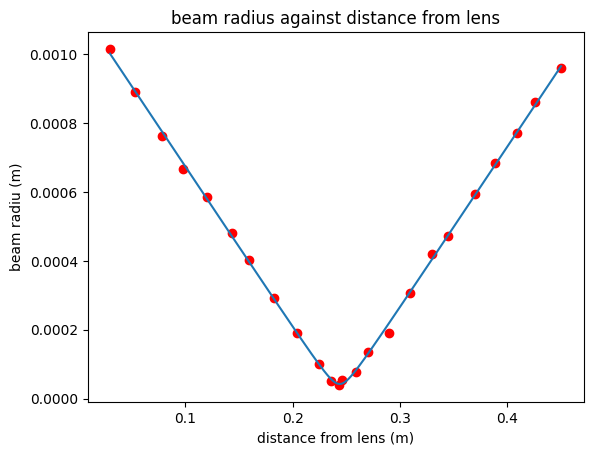

In [41]:
x_fit = np.linspace(0.03, 0.45, 10000)
y_fit = waist_func(x_fit, w0, z0, Msq)

#plotting equation with fitted variables (X axis) 
plt.scatter(x_values, y_values, color='red')
plt.xlabel("distance from lens (m)")
plt.ylabel("beam radiu (m)")
plt.title("beam radius against distance from lens")
plt.plot(x_fit, y_fit)
plt.show()

In [ ]:
# REDO
#Calculating parameters
def parameters(w0, Zrm):
    beam_divergence_angle = w0/Zrm
    unc_bda = (unc_w0 + unc_Zrm) * beam_divergence_angle

    return beam_divergence_angle, m_squared_value, unc_bda, unc_m2

beam_divergence_angle, m_squared_value, unc_bda, unc_m2 = parameters(w0, Zrm)

print("waist: ", w0, "m +-", unc_w0)
print("rayleigh range: ", Zrm, "m +-", unc_Zrm)
print("beam divergence angle: ", beam_divergence_angle, "m +-", unc_bda)